# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-1316 Introduction to *Urban* Data Science 


## Assignment 1: Data Collection and Wrangling


---



# ``Instructions``

This assignment puts together what you learned in **Weeks 1-2**. You will be working with a dataset which is in the form of a spreadsheet. It may contain many different data types in the columns. All data frames contain column names, which are strings, and row indices, which are integers. In this assignment you will illustrate your knwoledge about bundling various kinds of data together to be able to do higher-level tasks.

_Note:_ Go through **labs and homeworks 00-02** before starting this assignment. 

#### 1.1 Submission

Please submit the results by Brightspace under **Assignment 01**, using a single file as example,

```text
firstname_secondname_thirdname_lastname_01.html

```

**If your file is not named in lowercase letters as mentioned above, your assignment will not be read by the script that works to compile > 200 assignments and you will miss out on the grades. I don't want that, so be exceptionally careful that you name it properly. Don't worry if you spelled your name incorrectly. I want to avoid a situation where I have 200 assignments all called assignment_01.html**

Please **do not** submit any data or files other than the ``html file``.

#### 1.2 How do you convert to HTML? 

There are 2 ways, 

1. from a running notebook, you can convert it into html by clicking on the file tab on the main menu of Jupyter Lab 
    * File &rightarrow; Export Notebooks as... &rightarrow; Export Notebook to HTML
2. go to terminal or command line and type
    * ``jupyter nbconvert --to html <notebook_name>.ipynb  ``


#### 1.3 Learning Objectives

This assignment is designed to support three different learning objectives. After completing the following exercises you will be able to:

* Explore variables in a dataset
* Manage missing data 
* Reshape data to get it in a form useful for statistical analysis 

#### 1.4 Tasks

This assignment requires you to go through five tasks in cleaning your data. 

1. Reading and Summarizing the Data.
2. Subsetting the Data. This extracts just the part of the data you want to analyse. 
3. Manage Missing Data. Some data is not available for all objects of interest (rows) or all variables for every object (columns). 
4. Shape the Data. We need to convert the data into a suitable format for analysis. 
5. Saving the Results. The results are saved for future use.

<br/>

***

# ``Task 1: Downloading the Data``

For this assignment we are going to use the World Development Indicators database as a source of data. The World Development Indicators is the primary data source for the World Bank, a financial institution that provides loans to developing nations for investment in national infrastructure. The database is comprised of data from officially recognized sources all over the world. The data consists of time series which in some cases dates back over fifty years. Nations are variously categorized into different groups in order to permit the comparative analysis of nations. 

You can download the data here as a csv file (It is intentional that I am not explicitly telling you where exactly you will find the csv file on this website):
http://data.worldbank.org/data-catalog/world-development-indicators

So after you unzip, we’ll work with the file ``WDIData.csv``, which is in a modified csv format. All the other files around it are informative and may be useful for you to do a better analyses. These extra files only provide more information on data sources of indicators used in the main file. Put the data in a convenient location on your computer or laptop, ideally in a folder called **data** which is next to this **jupyter notebook**. I recommend taking a look at the file in a text editor like _atom_ for any system or notepad++ for windows. These will also make your life easy for everything else on your computer. 

It’s a big file and it may take a while to load onto your laptop and into Python (running on the jupyter labs environment). 

The data is organized with one country and all the data for one indicator on each line. But there are many countries, and many indicators. Every indicator may have data reaching back from _1960_. These are all shown together on the same line. Because the data is replicated by country, the file is longer than it is wide. We call it “long” data. Thus, each country may be repeated on rows based on the indicator that is shown.

## ``Exercise: Downloading the Data``

**IMPORTANT** make sure your code can run independent of the machine. i.e. 
- Use relative path links instead of absolute paths. If your data folder is named C:/HelloKitty/MyGummyBears/IlovePython/WDIData.csv, then your program will not be reproducible on any other machine. Check out this very easy to follow and handy guide on [relative paths](https://www.delftstack.com/howto/python/relative-path-in-python/).
- Organise the data in a folder called `data` and run your notebook next to it organised as follows

```text
├── trivik_verma_01.ipynb
├── data
│   ├── WDIData.csv
```

- Load the `WDIData.csv` file into Python
- Explore it by looking at first and last 5 rows
- Programattically find and print information on the data,
    - number of columns in the data
    - names of the columns in the data 
    - number of rows in the data (excluding the header names)
    - how many unique regions/countries in the data
    - how many unique national indicators are in the data

### 1.1 Import of necessary libraries and data
    
I import pandas, an open source library for data science, to analyze the data. As a next step, I use the read_csv function from pandas to read the data from the csv file. The data is obtained from the World Bank and contains information on the development of countries measured by different indicators and over time, starting as early as 1960. The csv file is saved in a data folder to make this notebook reproducible.


In [344]:
#import pandas package and call it pd
import pandas as pd

In [345]:
# use panda's read_csv function to read the csv file and save it in wdi_data, which is a dataframe object
wdi_data = pd.read_csv('data/WDIData.csv')

### 1.2 Explore the data

I want to get an overview of the data to get a better understanding of the structure. I use the following pandas functions to do so:

 - head() --> provides the first five entries of the dataframe
 - tail() --> provides the last five entries of the dataframe
 - columns --> provides the name of all columns
 - shape --> provides the number of rows and columns of the dataframe
 - unique() --> provides the number of unique values in a column of the dataframe


In [346]:
#print the first five entries
print(wdi_data.head())


                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2013       2014       2015  \
0   NaN   NaN   NaN   NaN   NaN  ...  16.936004  17.337896  17.687093   
1   NaN   NaN   NaN   NaN   NaN  ...   6.499471   6.680066   6.859110   
2   NaN   N

In [347]:
#print the last five entries
print(wdi_data.tail())

       Country Name Country Code  \
383567     Zimbabwe          ZWE   
383568     Zimbabwe          ZWE   
383569     Zimbabwe          ZWE   
383570     Zimbabwe          ZWE   
383571     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
383567  Women who believe a husband is justified in be...     SG.VAW.REFU.ZS   
383568  Women who were first married by age 15 (% of w...  SP.M15.2024.FE.ZS   
383569  Women who were first married by age 18 (% of w...  SP.M18.2024.FE.ZS   
383570  Women's share of population ages 15+ living wi...  SH.DYN.AIDS.FE.ZS   
383571  Young people (ages 15-24) newly infected with HIV     SH.HIV.INCD.YG   

        1960  1961  1962  1963  1964  1965  ...     2013     2014     2015  \
383567   NaN   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN     14.5   
383568   NaN   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      3.7   
383569   NaN   NaN   NaN   NaN   NaN   NaN  ...      NaN     33.5   

This first structural analysis showed me that I have 67 columns, as the years are on the columns while to country indicator combination describes each row. Furthermore, I already see some missing values in the data. Moreover, it is also clear that the data does not only include countries but also regions, as the first entries are for the region "Africa Eastern and Southern".

In [348]:
#print the names of the columns to get a better understanding
print(wdi_data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')


This output showed me that data was collected from 1960 to 2021.

In [349]:
# print the number of columns by using the python function len()
print(len(wdi_data.columns))

67


In [350]:
# To fully see the length of the dataframe, I print the number of rows
print(wdi_data.shape[0])

383572


In [351]:
# identify the number of unique countries
print(len(wdi_data['Country Code'].unique()))

266


In [352]:
#identify the number of unique indicators
print(len(wdi_data['Indicator Code'].unique()))

1442


I collected the following information:
- number of columns in the data: 67
- number of rows in the data: 383572
- number of unique countries/regions 266
- number of unique indicators  1442 <br>

I notice that they are way more rows than columns. Together with the information I got on the names of the columns, I can conclude that the data is in a long format. This means that each row contains information on one country and one indicator. The data is not in a wide format, where each row contains information on one country and all indicators. This is important to know, because I might have to reshape the data later on. Hence, I want to know how many unique countries and indicators are in the data. I use the unique() function to get this information. I notice that there are 266 unique countries/regions and 1442 unique indicators. 

<br/>

***

# ``Task 2: Subsetting the Data``

From now on we want a much smaller subset of this data. We have all the valid country information using the country code information in ``WDICountry.csv`` or in one of the columns of the main data itself. (Note that it is best practice to search using country codes and not real country names. Countries are known by many names by many different people and languages.) In the future, World Bank may change the datasets with new country names as the data collection efforts of orgs is not relevant to geopolitics. Hence, it is important to work with codes as opposed to names to make our analyses more reproducible across time.

The file ``WDISeries.csv`` contains a description of all the indicator variables and their names. We won’t actually use this file in the analysis, but you will find it helpful in designing your own analysis. Your objectives for this assignment is to select **4-7 variables** for further exploratory statistics (more information later in exercises). 

For example, I can show you what I did, 

```text
My hypothesis
I’d like to examine world broadband access. For that reason I chose a broadband account variable. The data is organized by country. I want to control for the wealth, population, and land area of the country. I also have a hypothesis that more urban countries are more likely to have good broadband services. There are economies of scale when providing services to a large city. 

I hypothesize that larger countries have lesser access, since it is expensive to provide access over larger areas. On the contrary, countries with a lot of urban land area can take advantage of economies of scale resulting in relatively more broadband users concentrated in smaller zones within the country. We also hypothesize that wealthier countries have better broadband access, since there is a larger market to provide the newest services. A final variable which we add is rail lines. I hypothesize that broadband lines can take advantage of existing infrastructure right-of-ways, of which rail is a surrogate measure. Furthermore, the presence of rail lines may indicate other factors including a geography which is conclusive to physical development, and favourable institutional factors which promote high technology development. 

My choice of variables were, 

| Variable Name                 | Variable Code     |
| ----------------------------- | ----------------- |
| Fixed broadband subscriptions | IT.NET.BBND       |
| GDP (current US$)             | NY.GDP.MKTP.CD    |
| Population, total             | SP.POP.TOTL       |
| Land area (sq. km)            | AG.LND.TOTL.K2    |
| Urban land area (sq. km)      | AG.LND.TOTL.UR.K2 |
| Rail lines (total route-km)   | IS.RRS.TOTL.KM    |

```

Recall that the data is organized with countries and variables on the rows, and years on the column. Using this table as a guide, I can now extract only those rows which contain these variable names, and throw out the great many other variables that I will not need. You are expected to do the same further down in the exercise. 

For now let’s set aside the added complexity of time series and dynamics. Our task is to select just one year with a lot of data for most countries.

## ``Exercise: Subsetting the Data``

- state your hypothesis in a markdown cell as I showed in the example above (there is no single right hypothesis, you are free to make a **reasonable** choice for this task)
- find the variables of interest for your hypothesis and mention them in the markdown cell (4-7 variables)
- your dataframe would have greatly reduced in size and looks neater, show us what it looks like now using head() or something similar
    - show some statistics like number or rows, columns, names of variables and unique countries etc.
- you’ll see that your data contains values for many years of data, or perhaps NA (“not applicable”), if the country has failed to report its findings. 
- For now let’s set aside the added complexity of time series and dynamics. Our task is to select just one year with a lot of data for most countries.
    - choose one year/column that you want to work with and drop the rest of the years. 

You can count the columns manually, but in a large data set like this it is accurate and convenient to let python calculate this for us. Get the index of relevant columns and store them in a variable. 

- when you do this for your own variables, you also will want to experiment to see which year you want to use. You might also choose to drop off some of your initial variable choices if they are poorly collected. 
- subset the data by creating a new dataframe only with ``your variables`` `[v1, v2, v3...]`

<hr>


### 2.1 My hypothesis

I like to analyze the a population health index. Therefore, I choose life expectancy as a proxy as life expectancy provides me with the mortality over a lifespan and is recorded for a large number of countries and regions.
I hypothesize that richer countries have a higher life expectancy as they have more resources and better infrastructure to provide health services. Hence, I include the country's wealth as a variable. I look at the UHC service coverage index, which states a score from 0 to 100 for essential health services (based on tracer interventions that include reproductive, maternal, newborn and child health, infectious diseases, noncommunicable diseases and service capacity and access). THe higher the score the higher is the coverage for essential health services. Furthermore, I argue that countries with a higher disparity between incomes, have a lower life expectancy as the country might have a high level of wealth, yet it is focused on a few while the larger part of the population will have a lower coverage. Hence, I include the Gini index as a variable, as it measures the distribution of income, 0 meaning perfect equality and 100 perfect inequality.
 I also hypothesize that countries with a higher urban population have a higher coverage as they have better infrastructure and more resources. Hence, I include the urban population as a variable. I also hypothesize that countries with a higher literacy rate have a higher coverage as they are more educated and hence have a better understanding of the importance of health services. Hence, I include the literacy rate as a variable. 
 I also look at the coverage of social insurance programs, as I argue that a higher coverage will lead to a higher life expectancy due to the fact, that more people will have access to health services and can also afford necessary but expensive treatments.
My choice of variables were, 
<br>

| Variable Name                                             | Variable Code     |
| -----------------------------                             | ----------------- |
| life expectancy                                           | SP.DYN.LE00.IN    |
| UHC service coverage index                                | SH.UHC.SRVS.CV.XD       |
| GDP (current US$)                                         | NY.GDP.MKTP.CD    |
| Incidence of tuberculosis (per 100,000 people)                                          | SH.TBS.INCD    |
| Hospital Beds (Per 1,000 People)                          | SH.MED.BEDS.ZS    |


### 2.2 Creating the subset

To obtain my subset of the original dataset, I use a python list that contains the codes for the selected indicators. I choose the indicator codes as the World Bank might change the names of the indicators over time.
Afterwards, I use this list of indicator codes together with pandas isin() function to create a subset which I save in the variable wdi_data_subset.

In [353]:
#List of selected indicators
selected_variables = ['SP.DYN.LE00.IN','SH.UHC.SRVS.CV.XD','NY.GDP.MKTP.CD','SH.TBS.INCD','SH.MED.BEDS.ZS']
#subset of the dataframe with only the selected indicators
wdi_data_subset = wdi_data[wdi_data['Indicator Code'].isin(selected_variables)]


### 2.3 Overview on subset

To quickly check if the subset was created correctly, I use the head() function to display the first 5 rows of the subset.

In [354]:
#print the first five rows of the subset with head()
print(wdi_data_subset.head())

                     Country Name Country Code  \
467   Africa Eastern and Southern          AFE   
558   Africa Eastern and Southern          AFE   
605   Africa Eastern and Southern          AFE   
697   Africa Eastern and Southern          AFE   
1386  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  \
467                                GDP (current US$)     NY.GDP.MKTP.CD   
558                 Hospital beds (per 1,000 people)     SH.MED.BEDS.ZS   
605   Incidence of tuberculosis (per 100,000 people)        SH.TBS.INCD   
697          Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
1386                      UHC service coverage index  SH.UHC.SRVS.CV.XD   

              1960          1961          1962          1963          1964  \
467   2.129059e+10  2.180847e+10  2.370702e+10  2.821004e+10  2.611879e+10   
558   1.959677e+00           NaN           NaN           NaN           NaN   
605           

I see that the subset still contains 67 columns and also my selected indicators, as expected.

Furthermore, I want to get a quick overview of the new dataframe and thus, use pandas info() function to display the number of rows and columns, the column names and the data types of the columns, as well as the non-null value count for each column.

In [355]:
print(wdi_data_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 467 to 383516
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1330 non-null   object 
 1   Country Code    1330 non-null   object 
 2   Indicator Name  1330 non-null   object 
 3   Indicator Code  1330 non-null   object 
 4   1960            534 non-null    float64
 5   1961            375 non-null    float64
 6   1962            377 non-null    float64
 7   1963            376 non-null    float64
 8   1964            376 non-null    float64
 9   1965            394 non-null    float64
 10  1966            394 non-null    float64
 11  1967            398 non-null    float64
 12  1968            403 non-null    float64
 13  1969            403 non-null    float64
 14  1970            584 non-null    float64
 15  1971            418 non-null    float64
 16  1972            419 non-null    float64
 17  1973            420 non-null 

This output shows me that I have 1330 country-indicator pairs left for my analysis. Furthermore, I can already see that not for all these pairs data was reported in each year.

### 2.4 Selection of specific year

As this analysis will not analyze the data for each country over time, I want to select only one year. To keep the highest level of quality for my analysis, I want to find out the year with the highest number of provided values. To do so, I use the pandas count() function to count the number of non-null values for each column. I then use the idxmax() function to find the column with the highest number of non-null values. I save the result in the variable year_with_most_values. As I want to exclude the first columns that are specific to countries and regions, I use the iloc[] function and look only from the 5th column onwards.

In [356]:
#Year with most entries, only included year columns with iloc
year_with_most_values = wdi_data_subset.iloc[:,5:].count().idxmax()
print(year_with_most_values)

2010


As I have identified the year with the most values, in this case 2010, I want to create a new dataframe that only contains this year. To do so, I use the pandas loc[] function to select all rows and only the columns on the country, indicator, and selected year. I save the result in the variable wdi_data_subset_for_selected_year.

In [357]:
#list with columns that I will need in the new dataframe
relevant_columns = ['Country Name','Country Code','Indicator Name','Indicator Code',year_with_most_values]
#create new dataframe with only the relevant columns and all rows
wdi_data_subset_for_selected_year = wdi_data_subset.loc[:,relevant_columns]

In [358]:
#Obtain overview on new created dataset using info()
print(wdi_data_subset_for_selected_year.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 467 to 383516
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1330 non-null   object 
 1   Country Code    1330 non-null   object 
 2   Indicator Name  1330 non-null   object 
 3   Indicator Code  1330 non-null   object 
 4   2010            1106 non-null   float64
dtypes: float64(1), object(4)
memory usage: 62.3+ KB
None


With this output, I see that my new dataframe still has 1862 rows, but I also notice that some values are missing in the 2010 column. This is due to the fact that not every country/region has reported a value for every indicator in 2010.

<h3>Checking Quality of Selected Indicators</h3>

As a next step, I want to check the quality of each indicator for the selected year. I do so by counting the values for the selected year, in this case 2010. To do so, I use pandas groupby() function to group the dataframe by the indicator code and then use the count() function to count the number of non-null values for each indicator. I print the result to the console.

In [359]:
# display count of values for each indicator
wdi_data_subset_for_selected_year.loc[:,['Indicator Code','Indicator Name',year_with_most_values]].groupby(['Indicator Code','Indicator Name']).count().sort_values(by=year_with_most_values,ascending=False)

,,2010
Indicator Code,Indicator Name,
NY.GDP.MKTP.CD,GDP (current US$),256
SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",248
SH.TBS.INCD,"Incidence of tuberculosis (per 100,000 people)",227
SH.UHC.SRVS.CV.XD,UHC service coverage index,204
SH.MED.BEDS.ZS,"Hospital beds (per 1,000 people)",171


With this output, I can easily see that for my selected year 2010, 256 countries/regions have reported a value, a vast majority of the available 266. However, I also see that only 32 have reported on the coverage of social insurance programs. Therefore, I will have to have a closer look at this indicator and decide if I want to use it in my analysis, as it might not have a large explanatory power.

<br/>

***

# ``Task 3: Reshape the Data``

As you may have noticed from your outputs above, the data is still not  in a form which is suitable for statistical analysis. Every row is a a combination of a country, a few variables, and a year. We’d like each row instead to be a country, and for there to be many columns according to the variables involved. 

The data is stored with one country and one variable by year. That’s long data. We want to convert it so each row is a case, and that case is a country. Then each column can store the variables for that country. That’s wide data. Our objectives in this section is to convert from one format of the data to the other. For the purposes of this assignment we’re not going to handle time series data, even though the World Development Indicators data often has many years of time history collected for each of the nations. That's why I asked you to select a particular year only.

You might ask why the original data was even stored in this manner. The most efficient means of storing data is to store everything once and then not repeat it. So for instance each element of this data set might be a combination of a country, variable and year. Any additional information, like the full and official name of the country, could be stored in a supplementary table and consulted only at need. 

That’s the most efficient way. But every user and application is slightly different. As noted above, typically what we need for statistical analysis is a single case on each row, and a set of variables in the columns. Our case is a country, and our variables are things like GDP and population as described above in my example choice of variables. This involves some restructuring of the data which we clearly don’t want to do by hand. Pandas is your best friend here. 

Reshaping data is a two-step process of melting and pivoting the data. Melting the data involves describing which data are indicators ("id") and which are variables for retrieval (“measure”). In this case your data may already be in melted form (long form). Pivoting then involves actually reshaping the data into the needed format. In this step, you have to reshape the data from long to wide format.
 
Pivoting the data involves specifying what data is on the rows and on the columns. Hint: functions melt and pivot offered by ``numpy`` library in python. For our analyses we want “Country.Code” to be on the rows, and to have all 4-7 variables as columns, where the value of each cell is the value taken from the column year that you chose at the subsetting step.



## ``Exercise: Reshape the Data``

- Examine the dimensions of the new pivoted data that you have created. Show it to us using head or print commands.
- Then rename all column names to something better and useful, by replacing codes with their names or shorthand names (ex. AG.LND.TOTL.UR.K2 ---> Urban Land Area).  
- Sort the data by putting higher values for one indicator of your choice go first. If there are overlapping values, try to put chronological countries go first.

<hr>


### 3.1 Reshape the Data

As the next step, I decided to reshape my data first, before I look at any missing data. Having the indicators on the columns will simplify the process of looking for missing data. Furthermore, it is easier to look for missing data in a wide format, as I can use the pandas isnull() function to check for missing values in each column.

In [360]:
# create the pivoted dataframe bringing the indicator codes to the columns
wdi_data_subset_for_selected_year_pivot = wdi_data_subset_for_selected_year.pivot(index=['Country Code','Country Name'], columns='Indicator Code', values=year_with_most_values)
# display the first five rows of the pivoted dataframe
print(wdi_data_subset_for_selected_year_pivot.head())

Indicator Code                            NY.GDP.MKTP.CD  SH.MED.BEDS.ZS  \
Country Code Country Name                                                  
ABW          Aruba                          2.453631e+09             NaN   
AFE          Africa Eastern and Southern    8.604783e+11             NaN   
AFG          Afghanistan                    1.585668e+10            0.43   
AFW          Africa Western and Central     5.915958e+11             NaN   
AGO          Angola                         8.169956e+10             NaN   

Indicator Code                            SH.TBS.INCD  SH.UHC.SRVS.CV.XD  \
Country Code Country Name                                                  
ABW          Aruba                                6.8                NaN   
AFE          Africa Eastern and Southern          NaN                NaN   
AFG          Afghanistan                        189.0               28.0   
AFW          Africa Western and Central           NaN                NaN   
AGO        

Looking at the output, I can see that I successfully moved the indicators to the columns of the dataframe and now have the desired dataframe shape. However, I also see that the column names are not very descriptive. Therefore, I want to rename the columns to something more meaningful. To do so, I use the pandas rename() function to rename the columns. I use the indicator names as the new column names. To do so, I save the indicator codes and their respective names in a dictionary, called indicator_code_to_text, having the codes as keys and the names as values. This way I can easily access the values with the keys during the renaming. I also use the inplace=True parameter to overwrite the existing dataframe.

In [361]:
# save indicator names in dictionary
indicator_code_to_text = {
    'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
    'SH.UHC.SRVS.CV.XD': 'UHC service coverage index',
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'SH.TBS.INCD': 'Incidence of tuberculosis (per 100,000 people)',
    'SE.PRM.CMPT.ZS': 'Primary completion rate, total (% of relevant age group) - World',
    'SH.MED.BEDS.ZS': 'Hospital beds (per 1,000 people)',
     'per_si_allsi.cov_pop_tot':'Coverage of social insurance programs (% of population)'
}
wdi_data_subset_for_selected_year_pivot = (wdi_data_subset_for_selected_year_pivot.rename(columns=indicator_code_to_text))
#Call .columns to check renaming
wdi_data_subset_for_selected_year_pivot.columns

Index(['GDP (current US$)', 'Hospital beds (per 1,000 people)',
       'Incidence of tuberculosis (per 100,000 people)',
       'UHC service coverage index',
       'Life expectancy at birth, total (years)'],
      dtype='object', name='Indicator Code')

I checked the output and can see that the column names are now more descriptive and will make further analysis easier.

<br/>

***

# ``Task 4: Manage Missing Data``

There is a lot of missing data. If you make the year on which you search too recent, many countries have not been able to report their data. If you make the year too long ago, the practice of administrative data collection had not yet taken hold. Countries did not know that collecting data would be a good thing; furthermore they have yet to back-fill their records. 

Why is data not available or missing in this dataset?
The data availability for urbanisation is especially limited. The urbanisation variable in particular ``AG.LND.TOTL.UR.K2`` is only available per decade. The most recent populated data for this example variable is therefore 2010, in variable ``2010``.
It’s quite possible that the World Bank is constructing estimates of urbanisation out of complex data sources such as satellite imagery. Regardless, it appears expensive to compute, and is therefore only offered every decade. 

We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

In this assignment we are going to use a number of these strategies. We can certainly be dropping off cases (strategy one). I am loathe to drop off whole indicators. But we can, for example, choose a year for the indicator where most of the data is available (strategy three).

Building a separate model to impute missing data, is often a good idea. But that requires a first working model before we even consider building a missing data model (and we haven't got there yet in this course); the working model and the missing data model are often constructed together. Note also that there are packages in Python which will construct a model of your data, and then impute missing values for you. You may or may not find these functions and packaging for modelling your data to be fully appropriate. Therefore treat these missing data models very seriously, and not as a black box. Models of missing data are as important, and deserve just as much care and caution as any other statistical model.  

In the next section I discuss some specifics about how the data is currently formatted, and how we would like to have it formatted for analysis purposes. 


## ``Exercise: Manage Missing Data``

We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column using comments or markdown text


<hr>

### 4.1 Evaluate Missing Data Sources

As a first step I want to have an overview on the amount of missing data for my selected indicators. Hence, I use the pandas isnull() function to check for missing values in each column. I then use the pandas sum() function to count the number of missing values in each column. I use the pandas sort_values() function to sort the columns by the number of missing values. I use the ascending=False parameter to sort the columns in descending order. 

In [362]:
# print number of missing values for each indicator
print((wdi_data_subset_for_selected_year_pivot.isnull().sum()).sort_values(ascending=False))

Indicator Code
Hospital beds (per 1,000 people)                  95
UHC service coverage index                        62
Incidence of tuberculosis (per 100,000 people)    39
Life expectancy at birth, total (years)           18
GDP (current US$)                                 10
dtype: int64


The last output provided me with the number of missing values per columns and I have sorted them in descending order. As a next step, I go thorugh the columns and decide what to do with the missing values. I will explain my choices in the following.

First, I will drop the 18 rows where I'm missing the life expectancy as this is my key variable that acts as a proxy for my population health index. I only want to work with the accurate values for this variable.

In [363]:
wdi_data_subset_for_selected_year_pivot = wdi_data_subset_for_selected_year_pivot[wdi_data_subset_for_selected_year_pivot['Life expectancy at birth, total (years)'].notna()]

In [364]:
print((wdi_data_subset_for_selected_year_pivot.isnull().sum()).sort_values(ascending=False))

Indicator Code
Hospital beds (per 1,000 people)                  82
UHC service coverage index                        53
Incidence of tuberculosis (per 100,000 people)    36
GDP (current US$)                                  5
Life expectancy at birth, total (years)            0
dtype: int64


In [365]:
import seaborn as sns

### 4.2 missing GDP Data

In [366]:
wdi_data_subset_for_selected_year_pivot['GDP (current US$)'].describe()

count    2.430000e+02
mean     2.216239e+12
std      7.441134e+12
min      1.552997e+08
25%      9.832106e+09
50%      5.290929e+10
75%      5.975151e+11
max      6.659605e+13
Name: GDP (current US$), dtype: float64

In [367]:
wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['GDP (current US$)'].isna(), 'GDP (current US$)']

Country Code  Country Name             
CHI           Channel Islands             NaN
MAF           St. Martin (French part)    NaN
PRK           Korea, Dem. People's Rep.   NaN
PYF           French Polynesia            NaN
SOM           Somalia                     NaN
Name: GDP (current US$), dtype: float64

- CHI   Channel Islands
- MAF   Saint Martin (French part)
- PRK   People's Republic of Korea
- PYF   French Polynesia
- SOM   Somalia

I notice that in my list I have two French overseas departments that are hence, not independent states but are part of France. I will therefore drop these two rows as their output is already include in the row for France.
The same goes for the Channel Islands, which are part of the United Kingdom. I will drop these rows as well.
I will also drop the row for the People's Republic of Korea as there is no data available for this country and furthermore, one could also question the quality of any provided data due to the political situation and position in international organizations.
For Somalia , I checked the World Bank website for the indicator and saw that Somalia didn't report any data between 1990 and 2013.

In [368]:
wdi_data_subset.loc[(wdi_data_subset['Country Code']== 'SOM') & (wdi_data_subset['Indicator Code']== 'NY.GDP.MKTP.CD'),'2005':]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
324917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.574496e+09,5.021956e+09,5.331761e+09,5.529873e+09,5.609000e+09,5.850677e+09,6.476675e+09,6.965285e+09,7.292722e+09,NaN


Seeing that the next provided value was in 2013, I will replace the missing values with the value from 2013.

In [369]:
#Set the value of 2010 to the value in 2013
wdi_data_subset_for_selected_year_pivot.loc['SOM','GDP (current US$)'] = wdi_data_subset.loc[(wdi_data_subset['Country Code']== 'SOM') & (wdi_data_subset['Indicator Code']== 'NY.GDP.MKTP.CD'),'2013'].values[0]
#Check if the value is set and not nan anymore
wdi_data_subset_for_selected_year_pivot.loc['SOM','GDP (current US$)']

Country Name
Somalia    4.574496e+09
Name: GDP (current US$), dtype: float64

In [370]:
wdi_data_subset_for_selected_year_pivot = wdi_data_subset_for_selected_year_pivot[wdi_data_subset_for_selected_year_pivot['GDP (current US$)'].notna()]

I want to check, if this was successful and therefore print the number of missing values again. I can see that the number of missing values has decreased to 0 for the GINI index. Furthermore, this step also eliminated all missing values for the GDP.

In [371]:
print((wdi_data_subset_for_selected_year_pivot.isnull().sum()).sort_values(ascending=False))

Indicator Code
Hospital beds (per 1,000 people)                  79
UHC service coverage index                        50
Incidence of tuberculosis (per 100,000 people)    34
GDP (current US$)                                  0
Life expectancy at birth, total (years)            0
dtype: int64


### 4.3 Missing Incidence of tuberculosis (per 100,000 people)

Next, I want to check the missing values for the Incidence of tuberculosis (per 100,000 people) indicator. First, I get a statistical overview on this column with .describe(). This way I can evaluate if it's feasible to replace the missing values with the mean or other percentiles.

In [372]:
wdi_data_subset_for_selected_year_pivot['Incidence of tuberculosis (per 100,000 people)'].describe()

count     210.000000
mean      139.300286
std       208.735341
min         0.960000
25%        18.000000
50%        59.500000
75%       186.000000
max      1590.000000
Name: Incidence of tuberculosis (per 100,000 people), dtype: float64

As the statistical overview gave a wide range of values, I decided to have a detailed look at the specific countries/regions that are missing values. I do that by filtering with .loc and having isna() as the condition. I then print the output to see the countries/regions that are missing values.

In [373]:
wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['Incidence of tuberculosis (per 100,000 people)'].isna(), 'Incidence of tuberculosis (per 100,000 people)']

Country Code  Country Name                                        
AFE           Africa Eastern and Southern                            NaN
AFW           Africa Western and Central                             NaN
ARB           Arab World                                             NaN
CEB           Central Europe and the Baltics                         NaN
CSS           Caribbean small states                                 NaN
EAR           Early-demographic dividend                             NaN
EMU           Euro area                                              NaN
EUU           European Union                                         NaN
FCS           Fragile and conflict affected situations               NaN
FRO           Faroe Islands                                          NaN
HPC           Heavily indebted poor countries (HIPC)                 NaN
IBD           IBRD only                                              NaN
IBT           IDA & IBRD total                           

Only recognized UN member states:
- Liechtenstein
- South Sudan

For Liechtenstein, I will replace the missing value with the value of the neighboring Switzerland, as both countries are high developed European countries, that have an outstanding healthcare system and hence, very low number of tubercoli cases.
I will have to drop South Sudan, as the country was only founded in 2011. Therefore, I cannot include it in an analysis for the year 2010.
All other countries or regions are not recognized as independent states by the United Nations or already included in the data of the other states and are therefore not included in the dataset.


Replacing Liechtenstein value with Switzerland value:

In [374]:
wdi_data_subset_for_selected_year_pivot.loc['LIE','Incidence of tuberculosis (per 100,000 people)'] = wdi_data_subset.loc[(wdi_data_subset['Country Code']== 'CHE') & (wdi_data_subset['Indicator Code']== 'SH.TBS.INCD'),'2010'].values[0]

Dropping of the remaining nan values:

In [375]:
wdi_data_subset_for_selected_year_pivot = wdi_data_subset_for_selected_year_pivot[wdi_data_subset_for_selected_year_pivot['Incidence of tuberculosis (per 100,000 people)'].notna()]
print((wdi_data_subset_for_selected_year_pivot.isnull().sum()).sort_values(ascending=False))

Indicator Code
Hospital beds (per 1,000 people)                  62
UHC service coverage index                        18
GDP (current US$)                                  0
Incidence of tuberculosis (per 100,000 people)     0
Life expectancy at birth, total (years)            0
dtype: int64


In [376]:
wdi_data_subset_for_selected_year_pivot.shape

(211, 5)

### 4.3 Missing Hospital beds (per 1,000 people) Data

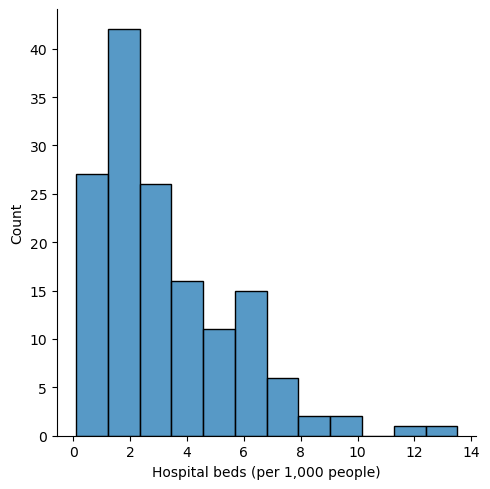

In [377]:
sns.displot(wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'])

In [378]:
wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].describe()

count    149.000000
mean       3.270758
std        2.407905
min        0.100000
25%        1.540000
50%        2.629761
75%        4.570000
max       13.510000
Name: Hospital beds (per 1,000 people), dtype: float64

In [379]:
countries_with_missing_hospital_bed_data = wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].isna(), 'Hospital beds (per 1,000 people)']
countries_with_missing_hospital_bed_data

Country Code  Country Name 
ABW           Aruba           NaN
AGO           Angola          NaN
BDI           Burundi         NaN
BGD           Bangladesh      NaN
BMU           Bermuda         NaN
                               ..
TGO           Togo            NaN
VEN           Venezuela, RB   NaN
VUT           Vanuatu         NaN
WSM           Samoa           NaN
ZWE           Zimbabwe        NaN
Name: Hospital beds (per 1,000 people), Length: 62, dtype: float64

I notice that most countries are African or from South America. All of them can be seen as less developed countries therefore, I don't think it would be accurate to replace the missing values with the mean or median value. I will first try to replace the values with the value of 2011, if it exists.

In [380]:
wdi_data_subset.loc[(wdi_data_subset['Country Code']== 'GIN') & (wdi_data_subset['Indicator Code']== 'SH.MED.BEDS.ZS'),'2005':]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
188018,0.3,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
for index,country in countries_with_missing_hospital_bed_data.items():
    wdi_data_subset_for_selected_year_pivot.loc[index[0],'Hospital beds (per 1,000 people)'] = wdi_data_subset.loc[(wdi_data_subset['Country Code']== index[0]) & (wdi_data_subset['Indicator Code']== 'SH.MED.BEDS.ZS'),'2011'].values[0]
#wdi_data_subset_for_selected_year_pivot.loc['SOM','GDP (current US$)'] = wdi_data_subset.loc[(wdi_data_subset['Country Code']== 'SOM') & (wdi_data_subset['Indicator Code']== 'NY.GDP.MKTP.CD'),'2013'].values[0]

In [382]:
wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].isna(), 'Hospital beds (per 1,000 people)']

Country Code  Country Name                              
ABW           Aruba                                        NaN
AGO           Angola                                       NaN
BMU           Bermuda                                      NaN
CIV           Cote d'Ivoire                                NaN
COD           Congo, Dem. Rep.                             NaN
COG           Congo, Rep.                                  NaN
CYM           Cayman Islands                               NaN
DZA           Algeria                                      NaN
FSM           Micronesia, Fed. Sts.                        NaN
GNB           Guinea-Bissau                                NaN
GRL           Greenland                                    NaN
GUM           Guam                                         NaN
GUY           Guyana                                       NaN
HKG           Hong Kong SAR, China                         NaN
HTI           Haiti                                        Na

In [383]:
wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].describe()

count    173.000000
mean       3.070826
std        2.341180
min        0.100000
25%        1.400000
50%        2.300000
75%        4.300000
max       13.510000
Name: Hospital beds (per 1,000 people), dtype: float64

In [384]:
wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].isna(), 'Hospital beds (per 1,000 people)'] = wdi_data_subset_for_selected_year_pivot['Hospital beds (per 1,000 people)'].describe().loc['25%']

In [386]:
print((wdi_data_subset_for_selected_year_pivot.isnull().sum()).sort_values(ascending=False))

Indicator Code
UHC service coverage index                        18
GDP (current US$)                                  0
Hospital beds (per 1,000 people)                   0
Incidence of tuberculosis (per 100,000 people)     0
Life expectancy at birth, total (years)            0
dtype: int64


### UHC service coverage index 

In [389]:
wdi_data_subset_for_selected_year_pivot.loc[wdi_data_subset_for_selected_year_pivot['UHC service coverage index'].isna(), 'UHC service coverage index']

Country Code  Country Name                                      
ABW           Aruba                                                NaN
BMU           Bermuda                                              NaN
CYM           Cayman Islands                                       NaN
EAP           East Asia & Pacific (excluding high income)          NaN
ECA           Europe & Central Asia (excluding high income)        NaN
GRL           Greenland                                            NaN
GUM           Guam                                                 NaN
HKG           Hong Kong SAR, China                                 NaN
LAC           Latin America & Caribbean (excluding high income)    NaN
LIE           Liechtenstein                                        NaN
LMY           Low & middle income                                  NaN
MAC           Macao SAR, China                                     NaN
MIC           Middle income                                        NaN
MNA         

In [392]:
wdi_data_subset_for_selected_year_pivot['UHC service coverage index'].describe()

count    193.000000
mean      58.080590
std       16.255618
min       20.000000
25%       45.000000
50%       60.000000
75%       70.000000
max       84.000000
Name: UHC service coverage index, dtype: float64

As these countries and regions are not recognized as independent states by the United Nations, I will drop the rows with missing values for the UHC service coverage index.

In [394]:
wdi_data_subset_for_selected_year_pivot = wdi_data_subset_for_selected_year_pivot[wdi_data_subset_for_selected_year_pivot['UHC service coverage index'].notna()]

I want to have a final overview on the amount of data that is left for further analysis. Thus, I use the shape function to get the rows and columns of my dataframe.

In [395]:
wdi_data_subset_for_selected_year_pivot.shape

(193, 5)

As seen in the previous output, I have 193 countries left for my 5 indicators. I believe this is a sufficient amount of data to continue with my analysis seeing that the UN has 193 member states.

<br/>

***

# ``Task 5: Saving the Results``

_Note:_ We do not need this file but we expect that if you learn how to save your data, it will be very useful in the future, as you do not need to run the script to clean your data again. 

## ``Exercise: Saving the Results``
- Save the cleaned dataframe as 'assignment-01-cleaned.csv' in data folder


<hr>

I use Pandas to_csv function to export my dataframe in the csv format. I save the file relative to this notebook in my data folder, so that others can also use this script.

In [388]:
wdi_data_subset_for_selected_year_pivot.to_csv('data/assignment-01-cleaned.csv')